## 第四章 随机变量的数字特征练习

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

## 正态分布代码  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

随机变量的数字特征

# 数学期望

## 随机变量的数学期望

### 0-1分布的数学期望

In [2]:
x, y, z = symbols('x y z')
p = symbols('p', positive=True)
n, k = symbols('n k', integer=True, positive=True)
# 0-1分布的数学期望
ex1 = 0*(1-p)+1*p
ex1 # 结果


### 二项分布的数学期望  
$C_n^m={n\over m}C_{n-1}^{m-1}$

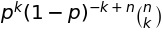

In [3]:
n, k = symbols('n k', integer=True, positive=True) # n设为正整数很重要
p = symbols('p', positive=True)

# 二项分布的概率
px = binomial(n, k) * p**(k) * (1 - p)**(n - k)
px
# 二项分布的全概率
summation(px, (k, 0, n)).simplify().args[0][0]
# 二项分布的数学期望
ex1 = summation(k*px, (k, 0, n)).simplify().args[0][0]
ex1 # 结果

### 泊松分布的数学期望

In [4]:
lamda = symbols('lamda')
# 泊松分布的概率
px = exp(-lamda)*lamda**k/factorial(k)
px
# 泊松分布的全概率
summation(px, (k, 0, oo))
# 泊松分布的数学期望
ex1 = summation(k*px, (k, 0, oo))
ex1 # 结果


### 几何分布的数学期望  


In [5]:
n, k = symbols('n k', integer=True, positive=True)
p = symbols('p', positive=True)
# 几何分布的概率
px = p * (1 - p)**(k-1)
# px = Piecewise((p * (1 - p)**(k-1), (p>0)&(p<1)),(0, True)) # 概率用分段函数表示
px
# 几何分布的全概率
summation(px, (k, 1, oo)).simplify().args[0][0]
# 几何分布的期望
ex1 = summation(k*px, (k, 1, oo)).simplify().args[0][0] 
ex1 # 结果

### 超几何分布的数学期望   
$X\sim H(N,M,n)$   
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

In [6]:
n, k, N, M = symbols('n k N M', integer=True, positive=True)
p = symbols('p', positive=True)
# 超几何分布的概率
px = binomial(M, k) * binomial(N - M, n - k) / binomial(N, n)
px
# 超几何分布的全概率
summation(px, (k, 0, n)).simplify()
# 超几何分布的期望
ex1 = summation(k * px, (k, 0, n)).simplify()
ex1 # 结果

### 均匀分布的数学期望

In [7]:
a, b = symbols('a b', real=True)
# a = symbols('a', real=True)
c = symbols('c', positive=True)
fx = Piecewise((1 / c, (x >= a) & (x <= a + c)), (0, True))
fx
# 均匀分布的全概率
p1 = Integral(fx, (x, a, a + c)).doit().simplify()
p1
# 均匀分布的数学期望
ex1 = Integral(x * fx, (x, a, a + c)).doit().simplify()
ex1
# 符号替换
# b = symbols('b', real=True) # b用符号替换回来
ex1.subs(c, (b - a)).simplify() # 结果

⎧1                       
⎪─  for a ≤ x ∧ x ≤ a + c
⎨c                       
⎪                        
⎩0        otherwise      

### 指数分布的数学期望  
$f(x)=\lambda e^{-\lambda x}$

In [8]:
# 数学arg表示复数的辐角
x = symbols('x')
lamda = symbols('lamda', real=True)
fx = lamda * exp(-lamda * x)
fx_ = Piecewise((lamda * exp(-lamda * x),x>0),(0, True))
# 指数分布的概率密度
fx_
# 指数分布的全概率
Integral(fx, (x, 0, oo)).doit().args[0][0] # 如果按分段函数积不出来，所以只积0到正无穷
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, 0, oo)).doit().args[0][0]
ex1 # 结果

⎧   -λ⋅x           
⎪λ⋅ℯ      for x > 0
⎨                  
⎪   0     otherwise
⎩                  

### 正态分布的数学期望

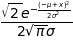

In [9]:
mu,sigma = symbols('mu sigma',real=True) # real设为True很重要
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
# 正态分布的全概率
Integral(fx, (x, -oo, oo)).doit().args[0][0] 
# 正态分布的数学期望
ex1 = Integral(x*fx, (x, -oo, oo)).doit().args[0][0]
ex1 # 结果

## 随机变量的函数的数学期望

In [10]:
x, y, z = symbols('x y z')
p, t  = symbols('p t', positive=True)
n, k = symbols('n k', integer=True, positive=True)
lamda = symbols('lamda')

#### 定理1  
$设X是离散型随机变量，其分布律为 \\ 
P\{X=k\}=p_k \ (k=1,2,...) \\ 
设Y是随机变量X的函数：Y=g(X)，\\
则E(Y)=E(g(x)) = \sum_{k=1}^{\infty}{g(x)p_k}，要求绝对收敛
$

### 例12   
$设X\sim \pi(\lambda)，求E(1/(X+1))$

In [11]:
lamda = symbols('lamda')
px = exp(-lamda)*lamda**k/factorial(k)
# 𝐸(1/(𝑋+1))
ex1 = summation((1/(k+1))*px, (k, 0, oo)).simplify()
ex1 # 结果

#### 定理2  
$设X是连续型随机变量,其概率密度为f(x)，设Y是随机变量X的函数：Y=g(X)，其中g(x)是连续函数 \\ 
则E(Y)=E(g(x)) = \int_{-\infty}^{+\infty}g(x)f(x)dx，要求绝对收敛
$

### 例14
$设随机变量X\sim E(1)，求Y=2X和Z=e^{-2X}的数学期望
$

In [12]:
fx = Piecewise((exp(-x), x>0),(0,True))
fx
Integral(x*fx,(x,0,oo)).doit()
# Y=2X
Integral(2*x*fx,(x,0,oo)).doit() # 2
Integral(exp(-2*x)*fx,(x,0,oo)).doit()

⎧ -x           
⎪ℯ    for x > 0
⎨              
⎪ 0   otherwise
⎩              

## 二维随机变量函数的数学期望

#### 命题1
$设二维离散型随机变量(X,Y)分布律为 \\ 
P\{X=x_i,Y=y_j\}=p_{ij} \ (i,j=1,2,...) \\ 
则函数Z=g(X,Y)的数学期望 \\
E(X)=E(g(X,Y)) = \sum_{j=1}^{\infty}\sum_{i=1}^{\infty}{g(x_i,y_j)p_{ij}}，要求绝对收敛
$

#### 命题2
$设二维连续型随机变量(X,Y)概率密度为地f(x,y) \\ 
则函数Z=g(X,Y)的数学期望 \\
E(X)=E(g(X,Y)) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}{g(x,y)f(x,y)dxdy}，要求绝对收敛
$

### 例15
$设随机变量(X,Y)的概率密度为\\
f(x,y)=\begin{cases} \frac{3}{2 x^{3} y^{2}} & \text{for}\: x > 1, \frac{1}{x}<y<x \\ 
0 & \text{otherwise} \end{cases}\\
求数学期望E(Y),E(1/XY)
$


In [13]:
# x1 = symbols('x',positive=True)
fxy = Piecewise((3/(2*x**3*y**2),(x>1)&(y<x)&(y>(1/x))),(0,True))
fxy
print_latex(fxy)
# 整体不好求积分，分开求积分
Integral(fxy,(y,1/x,x)).doit()
i1 = Piecewise(((3/2)*(1/x**2-1/x**4),(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit()

⎧   3                             1
⎪───────  for x > 1 ∧ x > y ∧ y > ─
⎪   3  2                          x
⎨2⋅x ⋅y                            
⎪                                  
⎪   0             otherwise        
⎩                                  

\begin{cases} \frac{3}{2 x^{3} y^{2}} & \text{for}\: x > 1 \wedge x > y \wedge y > \frac{1}{x} \\0 & \text{otherwise} \end{cases}


⎧       3            3                     
⎪──────────────── - ────  for x > 1 ∧ x < ∞
⎪   3                  4                   
⎨2⋅x ⋅Min(1/x, x)   2⋅x                    
⎪                                          
⎪           0                 otherwise    
⎩                                          

⎧1.5   1.5           
⎪─── - ───  for x > 1
⎪  2     4           
⎨ x     x            
⎪                    
⎪    0      otherwise
⎩                    

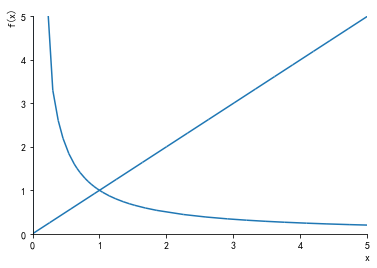

In [14]:
plot(1/x,x,xlim=(0,5),ylim=(0,5))

In [15]:
# E(Y)的数学期望
Integral(y*fxy,(y,1/x,x)).doit()
i1 = Piecewise((3*log(x)/x**3,(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit() # 结果3/4

⎧3⋅log(x)   3⋅log(Min(1/x, x))                   
⎪──────── - ──────────────────  for x > 1 ∧ x < ∞
⎪     3               3                          
⎨  2⋅x             2⋅x                           
⎪                                                
⎪              0                    otherwise    
⎩                                                

⎧3⋅log(x)           
⎪────────  for x > 1
⎪    3              
⎨   x               
⎪                   
⎪   0      otherwise
⎩                   

In [16]:
# E(1/XY)的数学期望  
Integral(fxy/(x*y),(y,1/x,x)).doit()
i1 = Piecewise(((3/4)*(1/x**2-1/x**6),(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit() # 结果0.6

⎧        3            3                     
⎪───────────────── - ────  for x > 1 ∧ x < ∞
⎪   4            2      6                   
⎨4⋅x ⋅Min(1/x, x)    4⋅x                    
⎪                                           
⎪           0                  otherwise    
⎩                                           

⎧0.75   0.75           
⎪──── - ────  for x > 1
⎪  2      6            
⎨ x      x             
⎪                      
⎪     0       otherwise
⎩                      

### 例16  
$飞机空投物资设目标为原点O(0,0)，物资着陆点为(X,Y)，X与Y相互独立，且都服从正态分布N(0,\sigma^2)，\\ 求物资着陆点(X,Y)到原点的距离的数学期望$

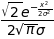

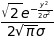

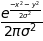

In [17]:
mu,sigma = symbols('mu sigma',real=True)
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2)).subs(mu,0)
fy = fx.subs(x, y)
fx
fy
fxy = (fx*fy).simplify()
fxy

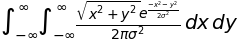

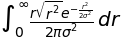

In [18]:
# Z=sqrt(X**2+Y**2)
z1 = sqrt(x**2+y**2)
i1 = Integral(z1*fxy,(x,-oo,oo),(y,-oo,oo)) # 不好积
# rho = symbols('rho',positive=True)
r = symbols('r')
theta = symbols('theta')
i1
# 改为极坐标
# rho
f1 = z1*fxy*r
# f1.replace((x**2+y**2), r**2).replace((-x**2-y**2), -r**2) # 可以，但麻烦
f2 = f1.replace(x**2,r**2-y**2) # 最好
# i2 = Integral(f2,(r,0,oo),(theta,0,2*pi))
# i2.doit()
# 带符号变量的分开积
i2 = Integral(f2,(r,0,oo))
i2
(i2.doit().args[0][0]*2*pi).simplify()


### 考研题1   
$设随机变量的概率分布为 \\
P\{X=k\}=\frac{C}{k!}, \ k=0,1,2,... \\
求E(X^2)
$

In [19]:
C = symbols('C')
k = symbols('k',integer=True,nonnegative=True)


In [20]:
px=C/factorial(k)
px
# summation(px,(k,0,oo)) # 𝑒𝐶
s1 = solve(summation(px,(k,0,oo))-1,C)[0]
px = px.subs(C,s1)
summation(k**2*px,(k,0,oo)) # 结果 2

### 考研题2  
$随机变量服从标准正态分布N(0,1),求E(Xe^{2X})$

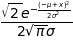

In [21]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2)) # 连着作用subs有问题
fx
fx = fx.subs({mu:0,sigma:1})
fx

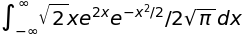

In [22]:
i1 = Integral(x*exp(2*x)*fx,(x,-oo,oo))
i1
# i1.doit()
i1.doit().simplify() #　结果

## 数学期望的性质  
$性质1：常数C的数学期望就是该常数本身,即E(C)=C \\ 
 性质2：设X是随机变量C是常数，则E(CX)=CE(X) \\
 性质3：设X,Y是随机变量，则E(X+Y)=E(X)+E(Y) \\
 推广：数学期望的线性性质 \\
 性质4：设X,Y是相互独立的随机变量，则E(XY)=E(X)E(Y) \\
 推广：n个相互独立的随机变量 \\
 注意：若X与Y不相互独立，则有E(XY)=E(X)E(Y)-E[E(X-E(X))E(Y-E(Y))] \\
$


### 例17    
$设X和Y有分布律$
$\begin{array}{c|ccc} 
X & 9 & 10 & 11 \\
\hline
p & 0.3 & 0.5 & 0.2 \\
\end{array}$
$\begin{array}{c|cc} 
Y & 6 & 7 \\
\hline
p & 0.4 & 0.6 \\
\end{array}$  
$若X,Y相互独立,验证E(X+Y)=E(X)+E(Y),E(XY)=E(X)E(Y)$

In [23]:
X=np.array([9,10,11],dtype='i4')
Y=np.array([6,7],dtype='i4')
px=np.array([0.3,0.5,0.2])
py=np.array([0.4,0.6])
# x的期望
ex = np.sum(X*px)
ex
# y的期望
ey = np.sum(Y*py)
ey

In [24]:
# 显示联合分布律和条件概率
dfx = pd.DataFrame(data=np.stack((X,px),axis=1),columns=['X','p'])
dfy = pd.DataFrame(data=np.stack((Y,py),axis=1),columns=['Y','p'])
# dfx
# dfy

# 联合分布律
pxy=np.dot(px[:,None],py[None,:])
dfxy=pd.DataFrame(data=pxy,index=X, columns=Y)
dfxy
# 条件概率
dfxy_y = dfxy.sum() # dfxy.sum(axis=0)
dfxy_x = dfxy.T.sum() # dfxy.sum(axis=1)
dfxy_x
dfxy_y


,6,7
9,0.12,0.18
10,0.20,0.30
11,0.08,0.12


9     0.3
10    0.5
11    0.2
dtype: float64

6    0.4
7    0.6
dtype: float64

In [25]:
v_xy = np.dot(X[:,None],Y[None,:]).reshape(-1)
p_xy = pxy.reshape(-1)
# p_xy
v_xy
p_xy
e_xy = np.sum(v_xy*p_xy)
# 说明E(XY)=E(X)+E(Y)
e_xy
ex*ey

array([54, 63, 60, 70, 66, 77])

array([0.12, 0.18, 0.2 , 0.3 , 0.08, 0.12])

In [26]:
# 计算E(X+Y)
# 二维随机变量通过广播处理,概率分布与XY相同
v_x = X[:, None].repeat(Y.shape[0], axis=1)
v_y = Y[None, :].repeat(X.shape[0], axis=0)
# v_x
# v_y
v_x_y = (v_x + v_y).reshape(-1)
v_x_y
e_x_y = np.sum(v_x_y*p_xy) # 计算期望不需要去除重复值
# 验证E(X+Y)=E(X)+E(Y)
e_x_y
ex+ey

array([15, 16, 16, 17, 17, 18])

### 例18 
$设(X,Y)的联合分布律为$   
$\begin{array}{c|ccc}
X,Y & 0 & 1 & 2 \\
\hline
0 & 0 & \frac{2}{15} & \frac{3}{15} \\
1 & \frac{1}{15} & \frac{6}{15} & \frac{3}{15} \\
\end{array}$  
$求E(3X-2Y)和E(XY)
$


In [27]:
X = np.array([0, 1])
Y = np.array([0, 1, 2])
pxy = np.array([[0, 2 / 15, 3 / 15], [1 / 15, 6 / 15, 3 / 15]])
df_xy = pd.DataFrame(data=pxy, index=X, columns=Y)
df_xy
py = np.sum(pxy, axis=0)
px = np.sum(pxy, axis=1)
px
py
ex = np.sum(X*px)
ex
ey = np.sum(Y*py)
ey
# 3X-2Y
e1 = 3*ex-2*ey
e1 # 结果

,0,1,2
0,0.000000,0.133333,0.2
1,0.066667,0.400000,0.2


array([0.33333333, 0.66666667])

array([0.06666667, 0.53333333, 0.4       ])

In [28]:
# XY
v_xy = np.dot(X[:,None],Y[None,:])
v_xy

e_xy = np.sum(v_xy*pxy)
e_xy # 结果

array([[0, 0, 0],
       [0, 1, 2]])

### 例19  
$设随机变量X和Y服从参数为2的指数分布,即它们的概率密度分别为 \\
f_X(x)=\begin{cases} 2e^{- 2 x} & x > 0 \\0 & x\le 0 \end{cases} \\
f_Y(y)=\begin{cases} 4e^{- 4 y} & y > 0 \\0 & y\le 0 \end{cases} \\
(1) E(X+Y)和E(2X-3Y^2) \\
(2) 设X,Y相互独立,求E(XY) \\
$

In [29]:
ex = 1/2
ey = 1/4
# X+Y
e_x_y = ex+ey
e_x_y
# 𝑌2
e_y2 = Integral(4*y**2*exp(-4*y),(y,0,oo)).doit()
e_y2
# 2𝑋−3𝑌2
e_2x_3y2 = 2*ex-3*e_y2
e_2x_3y2
# XY
e_xy=ex*ey
e_xy

# 方差

## 随机变量的方差

### 0-1分布的方差

In [30]:
x, y, z = symbols('x y z')
p = symbols('p', positive=True)
n, k = symbols('n k', integer=True, positive=True)

ex1 = 0 * (1 - p) + 1 * p
# 0-1分布的方差
# 定义法
dx1 = ((0 - ex1)**2 * (1 - p) + (1 - ex1)**2 * p).simplify()
dx1 
# 公式法
dx2 = (0**2 * (1 - p) + 1**2 * p - ex1**2).simplify()
dx2

### 二项分布的方差
$C_n^m={n\over m}C_{n-1}^{m-1}$

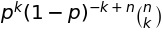

'***'

In [31]:
n, k = symbols('n k', integer=True, positive=True) # n设为正整数很重要
p,q= symbols('p q', positive=True)
# q = 1 - p
# 二项分布的概率
px = binomial(n, k) * p**(k) * (1 - p)**(n - k)
# px = binomial(n, k) * p**(k) * q**(n - k)
px
# 二项分布的全概率
summation(px, (k, 0, n)).simplify().args[0][0]
# 二项分布的数学期望
ex1 = summation(k*px, (k, 0, n)).simplify().args[0][0]
ex1
# 二项分布的方差
# 定义法: 太复杂，不好化简
# dx1 = summation((k-ex1)**2*px, (k, 0, n)).simplify()
# simplify(dacotx1) 
"***"
# 公式法
dx2 = summation(k**2*px, (k, 0, n)).args[0][0]-ex1**2
dx2 = simplify(dx2) 
dx2 # npq

simplify(dx2.replace((1-p),q)) # 去掉负号
dx2.replace((p-1),-q) # 结果


### 泊松分布的方差

In [32]:
lamda = symbols('lamda')
# 泊松分布的概率
px = exp(-lamda)*lamda**k/factorial(k)
px
# 泊松分布的全概率
summation(px, (k, 0, oo))
# 泊松分布的数学期望
ex1 = summation(k*px, (k, 0, oo))
# 二项分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 0, oo)).simplify()
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 0, oo))-ex1**2).simplify()
dx2 

'***'

### 几何分布的方差

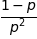

'***'

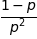

In [33]:
# 特别注意var和symbols的区别
n, k = symbols('n k', integer=True, positive=True)
p = symbols('p', positive=True)
# 几何分布的概率
px = p * (1 - p)**(k-1)
# px = Piecewise((p * (1 - p)**(k-1), (p>0)&(p<1)),(0, True)) # 概率用分段函数表示
px
# 几何分布的全概率
summation(px, (k, 1, oo)).simplify().args[0][0]
# 几何分布的期望
ex1 = summation(k*px, (k, 1, oo)).simplify().args[0][0] 
ex1
# 几何分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 1, oo)).simplify().simplify().args[0][0] # k要从1开始
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 1, oo))-ex1**2).simplify().args[0][0].simplify()
dx2 # 结果

### 超几何分布的方差  
$X\sim H(N,M,n)$  
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

'*****'

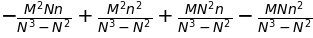

'***'

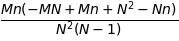

'*****'

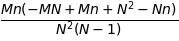

In [34]:
n, k, N, M = symbols('n k N M', integer=True, positive=True)
p = symbols('p', positive=True)
# 超几何分布的概率
px = binomial(M, k) * binomial(N-M, n-k)/binomial(N, n) 
px
# 超几何分布的全概率
summation(px, (k, 0, n)).simplify() 
# 超几何分布的期望
ex1 = summation(k*px, (k, 0, n)).simplify() 
"*****"
# 超何分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 0, oo)).simplify().args[0][0].expand()
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 0, oo))-ex1**2).simplify().args[0][0]
dx2 # 结果
"*****"
# 验证
dx_ = n*M/N - (n*M/N)**2 + n*(n-1)*M*(M-1)/(N*(N-1)) # 正确结果
# dx_
dx_.simplify()

### 均匀分布的方差

In [35]:
a,b=symbols('a b',real=True)
# a = symbols('a', real=True)
c = symbols('c', positive=True)
# b = a + c
fx = Piecewise((1 / c, (x >= a) & (x <= a + c)), (0, True))
fx
# 均匀分布的全概率
p1 = Integral(fx, (x, a, a + c)).doit().simplify()
p1
# 均匀分布的数学期望
ex1 = Integral(x * fx, (x, a, a + c)).doit().simplify()
ex1
"*****"
# 均匀分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, a, a + c)).doit().simplify()
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, a, a + c)).doit()-ex1**2).simplify()
dx2
# 符号替换
# b = symbols('b', real=True) # b用符号替换回来
# ex1.subs(c,(b-a)).simplify()
dx1.subs(c,(b-a)).simplify() # 结果

⎧1                       
⎪─  for a ≤ x ∧ x ≤ a + c
⎨c                       
⎪                        
⎩0        otherwise      

'*****'

'***'

### 指数分布的方差  
$f(x)=\lambda e^{-\lambda x}$

In [36]:
# 数学arg表示复数的辐角
x = symbols('x')
lamda = symbols('lamda', real=True)
fx = lamda * exp(-lamda * x)
fx_ = Piecewise((lamda * exp(-lamda * x),x>0),(0, True))
# 指数分布的概率密度
fx_
# 指数分布的全概率
Integral(fx, (x, 0, oo)).doit().args[0][0] # 如果按分段函数积不出来，所以只积0到正无穷
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, 0, oo)).doit().args[0][0]

# 指数分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, 0, oo)).doit().simplify().args[0][0]
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, 0, oo)).doit()-ex1**2).simplify().args[0][0]
dx2 # 结果

⎧   -λ⋅x           
⎪λ⋅ℯ      for x > 0
⎨                  
⎪   0     otherwise
⎩                  

'***'

### 正态分布的方差

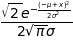

'*****'

'***'

In [37]:
mu,sigma = symbols('mu sigma',real=True) # real设为True很重要
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
# 指数分布的全概率
Integral(fx, (x, -oo, oo)).doit().args[0][0] 
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, -oo, oo)).doit().args[0][0]
"*****"
# 正态分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, -oo, oo)).doit().simplify().args[0][0]
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, -oo, oo)).doit()-ex1**2).simplify().args[0][0]
dx2 # 结果

## 方差的性质

### 例10  
$设随机变量X的概率密度为 \\
f(x)=\frac{1}{4} x^{2} e^{- \left|{x}\right|}\ (-\infty<x<+\infty)\\
求E(2X-3)和D(2X-3)
$

In [42]:
fx = (1/4)*x**2*exp(-Abs(x))
fx
print_latex(fx)

0.25 x^{2} e^{- \left|{x}\right|}


In [48]:
Integral(fx,(x,-oo,oo)).doit() # 1
ex1 = Integral(x*fx,(x,-oo,oo)).doit() # 0
#E(2X-3)
ex2 = Integral((2*x-3)*fx,(x,-oo,oo)).doit() # -3
ex2 # 结果
#D(2X-3)
dx1 = Integral(x**2*fx,(x,-oo,oo)).doit()-ex1**2
dx1
dx2 = 4*dx1
dx2 # 结果

#### 考研题1998年数学一第13题  
$ 设随机变量𝑋,𝑌相互独立，且都服从均值为0方差为1/2的正态分布，求随机变量|X-Y|的方差$ 

In [18]:
# Z=X-Y
mu_1 = 0
sigma_1 = 0.5
mu_2 = 0
sigma_2 = 0.5

e_z = mu_1 - mu_2
d_z = 1**2*sigma_1 + 1**2*sigma_2
e_z
d_z # Z服从均值为0方差为1的正态分布

mu,sigma = symbols('mu sigma')
f_z = (1/(sigma*sqrt(2*pi)))*exp(-(z-mu)**2/(2*sigma**2))
f_z = f_z.subs({mu:0,sigma:1})
f_z
# |Z|=|X-Y|
# Integral(Abs(z)*fz, (z,-oo,oo)).doit()
e_z_abs=2*Integral(z*f_z, (z,0,oo)).doit() # 偶函数，去绝对值
e_z_abs

# 法一: 知道Z的方差和期望,先求Z**2的期望,再根据公式求|Z|的方差
# E(|Z|**2) = D(Z)+(E(Z))**2
e_z_abs2 = d_z + e_z**2

e_z_abs2
# Integral(z**2*f_z, (z,-oo,oo)).doit()-e_z_abs**2
# D(|Z|) = E(|Z|**2) - E(|Z|)**2
d_z_abs = e_z_abs2 - e_z_abs**2
d_z_abs # 结果

# 法二:直接根据公式计算
Integral(z**2*f_z, (z,-oo,oo)).doit()-e_z_abs**2 # 结果

#### 考研题2001年数学4第12题  
$设两个随机变量X和Y的联合分布在(0,1),(1,0),(1,1)为顶点的三角形区域上服从均匀分布，试求随机变量Z=X+Y的方差$  
$提示：由于G关于y=x对称\\
\iint_G ydxdy=\iint_G xdxdy \\
\iint_G y^2 dxdy=\iint_G x^2 dxdy$

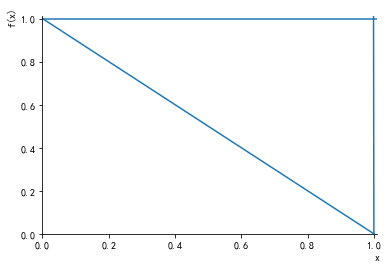

In [24]:
# G区域绘图
plot(1,1-x,-1000*(x-1),xlim=(0,1.01),ylim=(0,1.01))

In [25]:
# 概率密度,区域为G
f_xy = Piecewise((2,(x>0)&(x<1)&(y>0)&(y<1)&(y>1-x)),(0,True))
f_xy

⎧2  for x > 0 ∧ y > 0 ∧ y > 1 - x ∧ x < 1 ∧ y < 1
⎨                                                
⎩0                    otherwise                  

In [33]:
# 不知道是否独立,所以直接计算Z=X+Y的方差
# E(Z)**2
e_z2 = Integral((x+y)**2*f_xy,(y,1-x,1),(x,0,1)).doit()
e_z2

# E(Z)
e_z = Integral((x+y)*f_xy,(y,1-x,1),(x,0,1)).doit()
# e_z = 2*Integral((x)*f_xy,(y,1-x,1),(x,0,1)).doit() # 由于G关于y=x对称，也可以这样算
e_z
# D(Z)
d_z = e_z2 - e_z**2

d_z # 结果

# 协方差及相关系数


## 协方差的定义

## 协方差的计算公式

### 例1  
$
设随机变量X,Y具有概率密度\\
\begin{cases} \frac{x+y}{8} & 0 \le x \le2, 0 \le y \le 2 \\0 & \text{otherwise} \end{cases}\\
求E(X),E(Y),Cov(X,Y),\rho_{XY},D(X+Y)
$

In [35]:
f_xy = Piecewise(((x+y)/8,(x>=0)&(x<=2)&(y>=0)&(y<=2)),(0,True))
f_xy
print_latex(f_xy)

⎧x   y                                   
⎪─ + ─  for x ≥ 0 ∧ y ≥ 0 ∧ x ≤ 2 ∧ y ≤ 2
⎨8   8                                   
⎪                                        
⎩  0                otherwise            

\begin{cases} \frac{x}{8} + \frac{y}{8} & \text{for}\: x \geq 0 \wedge y \geq 0 \wedge x \leq 2 \wedge y \leq 2 \\0 & \text{otherwise} \end{cases}


In [44]:
# E(X),E(Y)
e_x = Integral(x*f_xy, (y,0,2), (x,0,2)).doit()
e_x # 结果
# e_y = Integral(y*f_xy, (x,0,2), (y,0,2)).doit()
e_y = e_x # 利用对称性
# e_y

# Cov(X,Y)
# 定义法
# cov_xy = Integral((x-e_x)*(y-e_y)*f_xy, (y,0,2), (x,0,2)).doit()
# 公式法
cov_xy = Integral(x*y*f_xy, (y,0,2), (x,0,2)).doit() - e_x*e_y
cov_xy # 结果

# rho(X,Y)
d_x = Integral(x**2*f_xy, (y,0,2), (x,0,2)).doit() - e_x**2
d_y=d_x
# d_x 
rho_xy = cov_xy/(sqrt(d_x)*sqrt(d_y))
rho_xy # 结果

# D(X+Y)
d_xpy = d_x + d_y - 2*cov_xy
d_xpy

## 协方差的性质

### 例2  
$设二维随机变量(X,Y)的概率密度 \\
f(x,y)=\begin{cases} \frac{1}{\pi}, & \ x^{2} + y^{2} \leq 1 \\0, & \text{otherwise} \end{cases} \\
试讨论X与Y的相关性和独立性
$

In [7]:
f_xy = Piecewise((1/pi,x**2+y**2<=1),(0,True))
f_xy
# f_xy.subs({x:0,y:1})
print_latex(f_xy)

⎧1       2    2    
⎪─  for x  + y  ≤ 1
⎨π                 
⎪                  
⎩0     otherwise   

\begin{cases} \frac{1}{\pi} & \text{for}\: x^{2} + y^{2} \leq 1 \\0 & \text{otherwise} \end{cases}


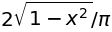

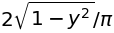

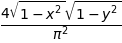

In [33]:
# 独立性
# r,theta = symbols('r,theta',positive=True)
f_x = (Integral(f_xy,(y,sqrt(1-x**2)))-Integral(f_xy,(y,-sqrt(1-x**2)))).doit()# 牛顿-莱布尼茨公式
f_x
f_y = f_x.subs(x,y)
f_y
(f_x*f_y).simplify()

In [22]:
# 相关性
e_x = Integral(f_xy, (y,-oo,oo),(x,-oo,oo)).doit()
e_x

∞                        
⌠                        
⎮  ⎧        2    2       
⎮  ⎪∞  for x  + y  ≤ 1   
⎮  ⎨                   dx
⎮  ⎪0     otherwise      
⎮  ⎩                     
⌡                        
-∞                       

# 矩、协方差矩阵

In [38]:
Integral(sin(x)/x,(x,0,oo)).doit()